In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
# ! pip install geopandas==0.3.0
# ! pip install pyshp==1.2.10
# ! pip install shapely==1.6.3

### drought states dataset

#### merged 
---

In [2]:
# dataset of drought by population, area, and DSCI
populat_grought = pd.read_csv('./data/population.csv')
area_drought = pd.read_csv('./data/areas.csv')
values_drought = pd.read_csv('./data/values_DSCI.csv')

In [3]:
# sort the values 
cities=values_drought['Name'].unique() # create a list with the cities
dfr=pd.DataFrame() # empty dataframe

#for loop to sort the time
for i in cities:
    e=values_drought[values_drought['Name']==i]
    dfr=dfr.append(e.iloc[::-1])

#reset index 
dfr.reset_index(inplace=True)
dfr.drop('index',axis=1,inplace=True)


In [4]:
#changing names columns to merge them
populat_grought['population_none']=populat_grought['None']
populat_grought['population_d0']=populat_grought['D0']
populat_grought['population_d1']=populat_grought['D1']
populat_grought['population_d2']=populat_grought['D2']
populat_grought['population_d3']=populat_grought['D3']
populat_grought['population_d4']=populat_grought['D4']

#droping columns duplicated 
populat_grought.drop(populat_grought.iloc[:, :11], inplace = True, axis = 1)

In [5]:
# Merging the 3 dataframes prueba

drought_state = pd.concat([area_drought, populat_grought,dfr], axis=1)
print(drought_state.shape)

(56888, 20)


In [6]:
#Change the numbers on float

drought_state['None'] = drought_state['None'].str.replace(",", "").astype(float)
drought_state['D0'] = drought_state['D0'].str.replace(",", "").astype(float)
drought_state['D1'] = drought_state['D1'].str.replace(",", "").astype(float)
drought_state['D2'] = drought_state['D2'].str.replace(",", "").astype(float)
drought_state['D3'] = drought_state['D3'].str.replace(",", "").astype(float)
drought_state['D4'] = drought_state['D4'].str.replace(",", "").astype(float)

drought_state['population_none'] = drought_state['population_none'].str.replace(",", "").astype(float)
drought_state['population_d0'] = drought_state['population_d0'].str.replace(",", "").astype(float)
drought_state['population_d1'] = drought_state['population_d1'].str.replace(",", "").astype(float)
drought_state['population_d2'] = drought_state['population_d2'].str.replace(",", "").astype(float)
drought_state['population_d3'] = drought_state['population_d3'].str.replace(",", "").astype(float)
drought_state['population_d4'] = drought_state['population_d4'].str.replace(",", "").astype(float)

In [7]:
#changing the format of the time
drought_state['ValidStart']= pd.to_datetime(drought_state['ValidStart'])
drought_state['ValidStart'] = drought_state['ValidStart'].dt.strftime('%m/%d/%Y')

drought_state['ValidEnd']= pd.to_datetime(drought_state['ValidEnd'])
drought_state['ValidEnd'] = drought_state['ValidEnd'].dt.strftime('%m/%d/%Y')

drought_state['ValidStart']=drought_state['ValidStart'].astype('datetime64[ns]')
drought_state['ValidEnd']=drought_state['ValidEnd'].astype('datetime64[ns]')

In [8]:
#drop unnecessary columns
drought_state.drop(columns=['MapDate','StatisticFormatID'],axis=1,inplace=True)

In [9]:
# rename the columns

drought_state.rename(columns={'StateAbbreviation':'state','None':'area_none','D0':'area_d0','D1':'area_d1','D2':'area_d2','D3':'area_d3','D4':'area_d4'},inplace=True)


# Organize the columns

drought_state=drought_state[['Name','state','ValidStart', 'ValidEnd','area_none', 'area_d0', 'area_d1', 'area_d2', 'area_d3','area_d4','population_none', 'population_d0',
       'population_d1', 'population_d2', 'population_d3', 'population_d4','DSCI']]

# creating new columns adding the columns total_area and total population

drought_state['total_area']=drought_state['area_none']+drought_state['area_d0']+drought_state['area_d1']+drought_state['area_d2']+drought_state['area_d3']+drought_state['area_d4']
drought_state['total_population']=drought_state['population_none']+drought_state['population_d0']+drought_state['population_d1']+drought_state['population_d2']+drought_state['population_d3']+drought_state['population_d4']

#### Data info
---

In [10]:
drought_state.head()

,Name,state,ValidStart,ValidEnd,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_area,total_population
0,Alaska,AK,2021-12-07,2021-12-13,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
1,Alaska,AK,2021-11-30,2021-12-06,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
2,Alaska,AK,2021-11-23,2021-11-29,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
3,Alaska,AK,2021-11-16,2021-11-22,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99
4,Alaska,AK,2021-11-09,2021-11-15,582568.29,0.0,0.0,0.0,0.0,0.0,709629.99,0.0,0.0,0.0,0.0,0.0,0,582568.29,709629.99


In [11]:
drought_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56888 entries, 0 to 56887
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              56888 non-null  object        
 1   state             56888 non-null  object        
 2   ValidStart        56888 non-null  datetime64[ns]
 3   ValidEnd          56888 non-null  datetime64[ns]
 4   area_none         56888 non-null  float64       
 5   area_d0           56888 non-null  float64       
 6   area_d1           56888 non-null  float64       
 7   area_d2           56888 non-null  float64       
 8   area_d3           56888 non-null  float64       
 9   area_d4           56888 non-null  float64       
 10  population_none   56888 non-null  float64       
 11  population_d0     56888 non-null  float64       
 12  population_d1     56888 non-null  float64       
 13  population_d2     56888 non-null  float64       
 14  population_d3     5688

In [12]:
drought_state[['DSCI','total_area','total_population']].describe()

,DSCI,total_area,total_population
count,56888.000000,56888.000000,5.688800e+04
mean,75.988556,69226.005450,5.989620e+06
std,100.787834,85895.250749,6.692471e+06
min,0.000000,60.200000,5.636260e+05
25%,0.000000,32077.540000,1.761651e+06
50%,29.000000,54605.605000,4.085220e+06
75%,117.000000,82607.670000,6.591857e+06
max,484.000000,582568.300000,3.725396e+07


In [13]:
drought_state.columns

Index(['Name', 'state', 'ValidStart', 'ValidEnd', 'area_none', 'area_d0',
       'area_d1', 'area_d2', 'area_d3', 'area_d4', 'population_none',
       'population_d0', 'population_d1', 'population_d2', 'population_d3',
       'population_d4', 'DSCI', 'total_area', 'total_population'],
      dtype='object')

In [14]:
drought_state.shape

(56888, 19)

In [15]:
#checking how many day have a state

drought_state['state'].value_counts()

WV    1094
WI    1094
DE    1094
AZ    1094
NM    1094
LA    1094
VA    1094
NY    1094
PA    1094
OR    1094
MD    1094
ID    1094
MS    1094
WA    1094
WY    1094
MA    1094
FL    1094
HI    1094
CA    1094
ME    1094
KY    1094
CT    1094
OH    1094
AR    1094
UT    1094
NJ    1094
CO    1094
KS    1094
MO    1094
RI    1094
NC    1094
NV    1094
TX    1094
NE    1094
OK    1094
SD    1094
NH    1094
IN    1094
SC    1094
MN    1094
AL    1094
MT    1094
ND    1094
VT    1094
IA    1094
PR    1094
TN    1094
DC    1094
MI    1094
AK    1094
IL    1094
GA    1094
Name: state, dtype: int64

In [16]:
#saving the dataframe
drought_state.to_csv('./data/drought_state.csv', index=False)

#### grafics
---

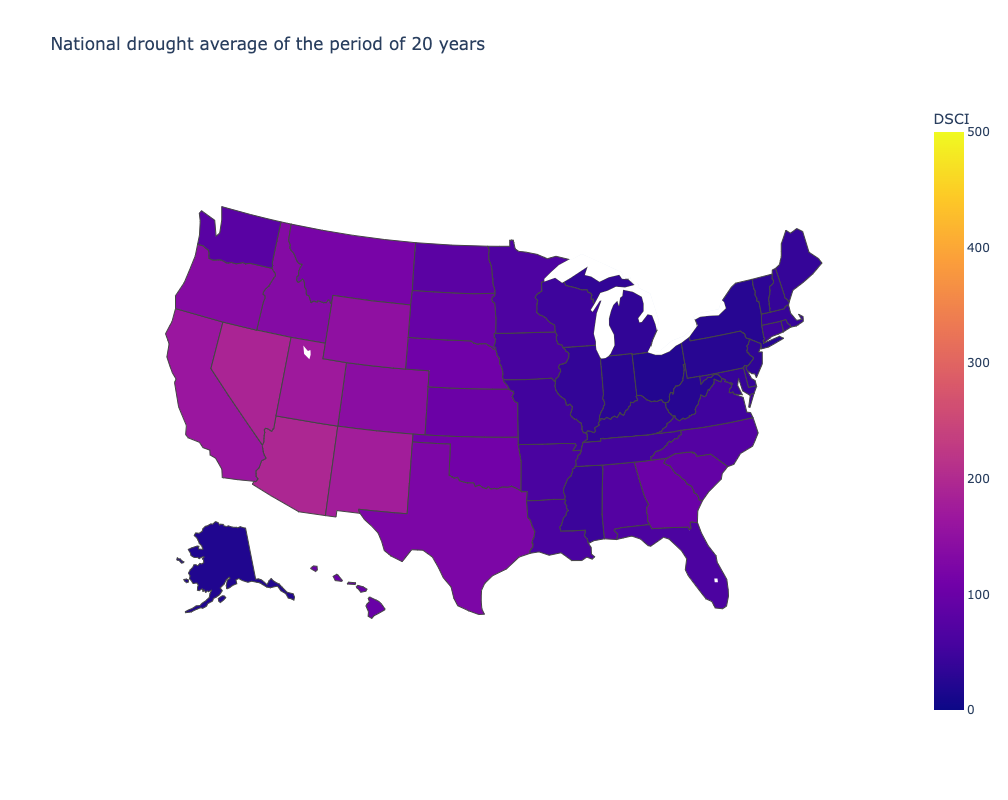

In [36]:
#Average drought throuth the years
mean_states=drought_state.groupby('state').mean()
mean_states.reset_index(inplace=True)
fig = px.choropleth(mean_states,locations='state',
                    locationmode='USA-states',
                    color='DSCI',
                    title=f'National drought average of the period of 20 years',
                    range_color=(0, 500),width=800, height=800,
                    scope='usa')
fig.show()


In [18]:
#creating a dataframe for the avarege drought of the state by year
mean_year= drought_state.groupby(by=[drought_state['ValidEnd'].dt.year,drought_state['state']])['DSCI'].agg([ 'mean'])
mean_year.reset_index(inplace=True)
mean_year.rename(columns={'mean':'mean_DSCI'},inplace=True)
mean_year.head()

,ValidEnd,state,mean_DSCI
0,2001,AK,0.226415
1,2001,AL,51.320755
2,2001,AR,46.792453
3,2001,AZ,1.981132
4,2001,CA,89.188679


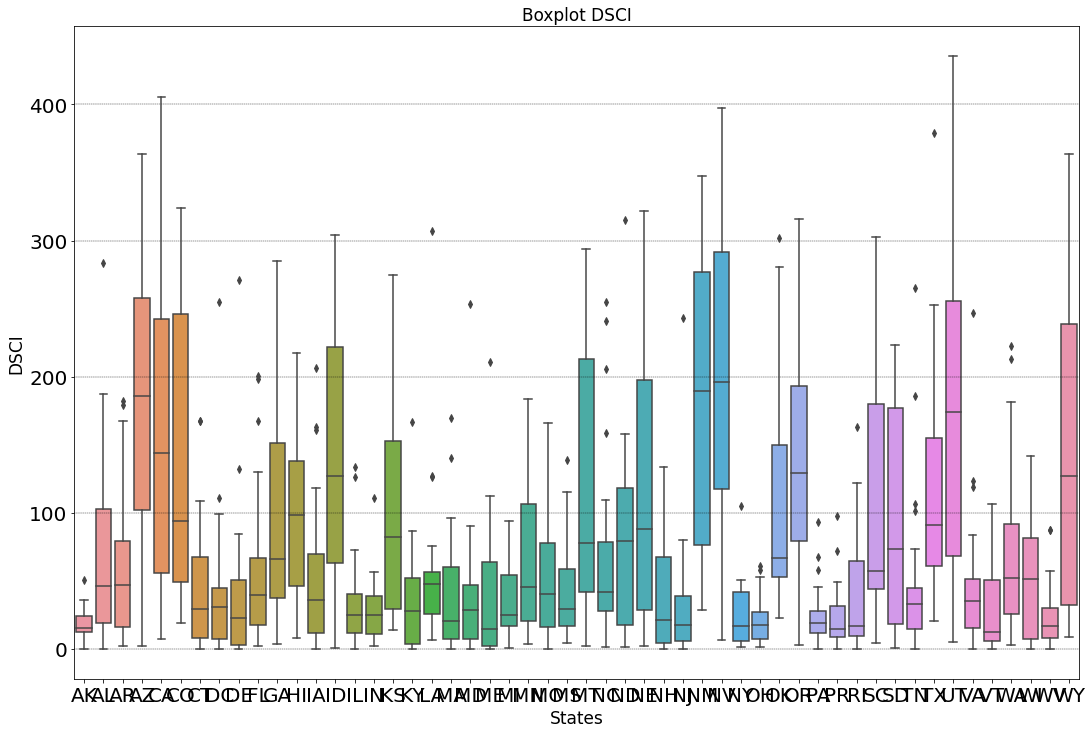

In [39]:
#graph the DCSI of the regions
plt.figure(figsize=(18, 12))
sns.boxplot(x='state',
    y='mean_DSCI',
    data=mean_year)
plt.title('Boxplot DSCI',fontdict={'fontsize':17});
plt.xlabel('States',fontdict={'fontsize':17});
plt.ylabel('DSCI',fontdict={'fontsize':17});
plt.grid(axis = 'y',color = 'black', linestyle = '--', linewidth = 0.4)
plt.savefig('./images/drought_boxplot.png')

In [20]:
utah=drought_state[drought_state['state']=='UT']
utah.set_index('ValidStart',inplace=True)
cali=drought_state[drought_state['state']=='CA']
cali.set_index('ValidStart',inplace=True)
nevada=drought_state[drought_state['state']=='NV']
nevada.set_index('ValidStart',inplace=True)
arizona=drought_state[drought_state['state']=='AZ']
arizona.set_index('ValidStart',inplace=True)

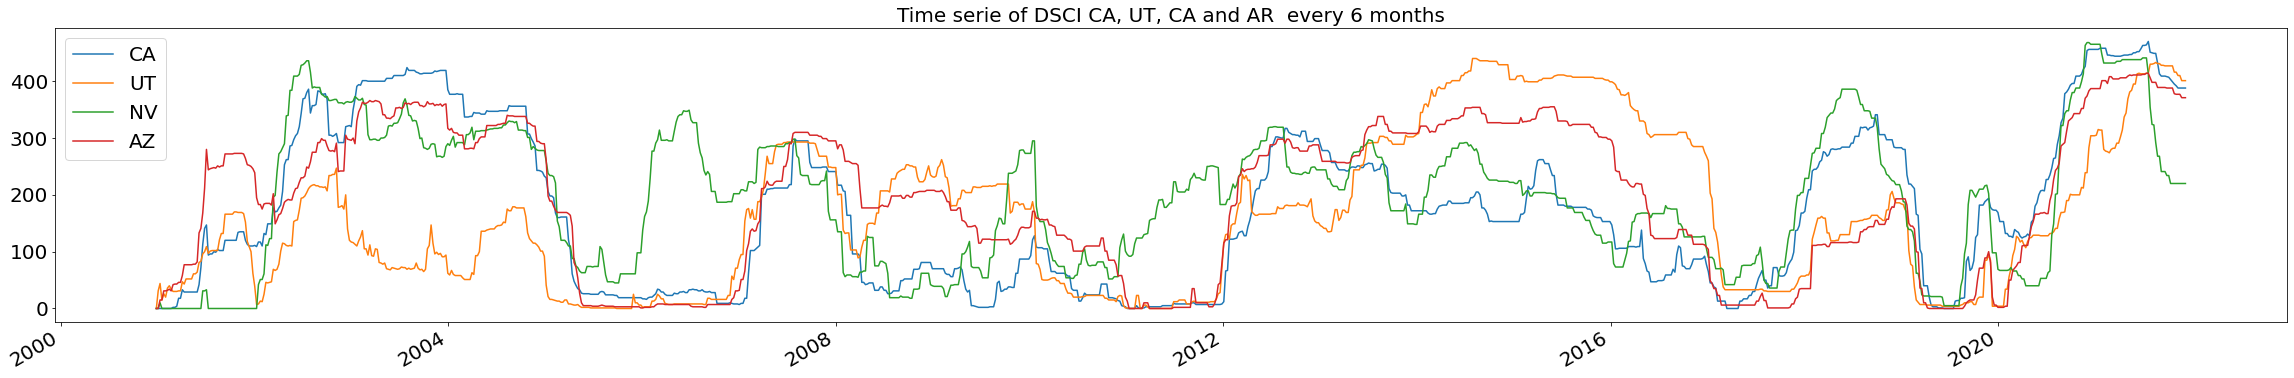

In [40]:
fig, ax = plt.subplots(figsize=(40, 6))
 


ax.plot(utah['DSCI'])
ax.plot(cali['DSCI'])
ax.plot(arizona['DSCI'])
ax.plot(nevada['DSCI'])

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.title('Time serie of DSCI CA, UT, CA and AR  every 6 months',fontdict={'fontsize':20});
plt.legend(['CA','UT','NV','AZ'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images/6_months.png')
#https://www.it-swarm-es.com/es/python/como-cambiar-el-tamano-de-fuente-en-un-grafico-de-matplotlib/970648288/

In [22]:
mean_year.head()

,ValidEnd,state,mean_DSCI
0,2001,AK,0.226415
1,2001,AL,51.320755
2,2001,AR,46.792453
3,2001,AZ,1.981132
4,2001,CA,89.188679


In [23]:
def graph_years(df,year):
    drought_y = df[df['ValidEnd']==year]
    fig = px.choropleth(drought_y,locations='state',
                        locationmode='USA-states',
                        color='mean_DSCI',
                        title=f'National drought average {year}',
                        labels={'mean_DSCI':'DSCI rate'},
                        range_color=(0, 500),width=800, height=800,
                        scope='usa')
    fig.show()

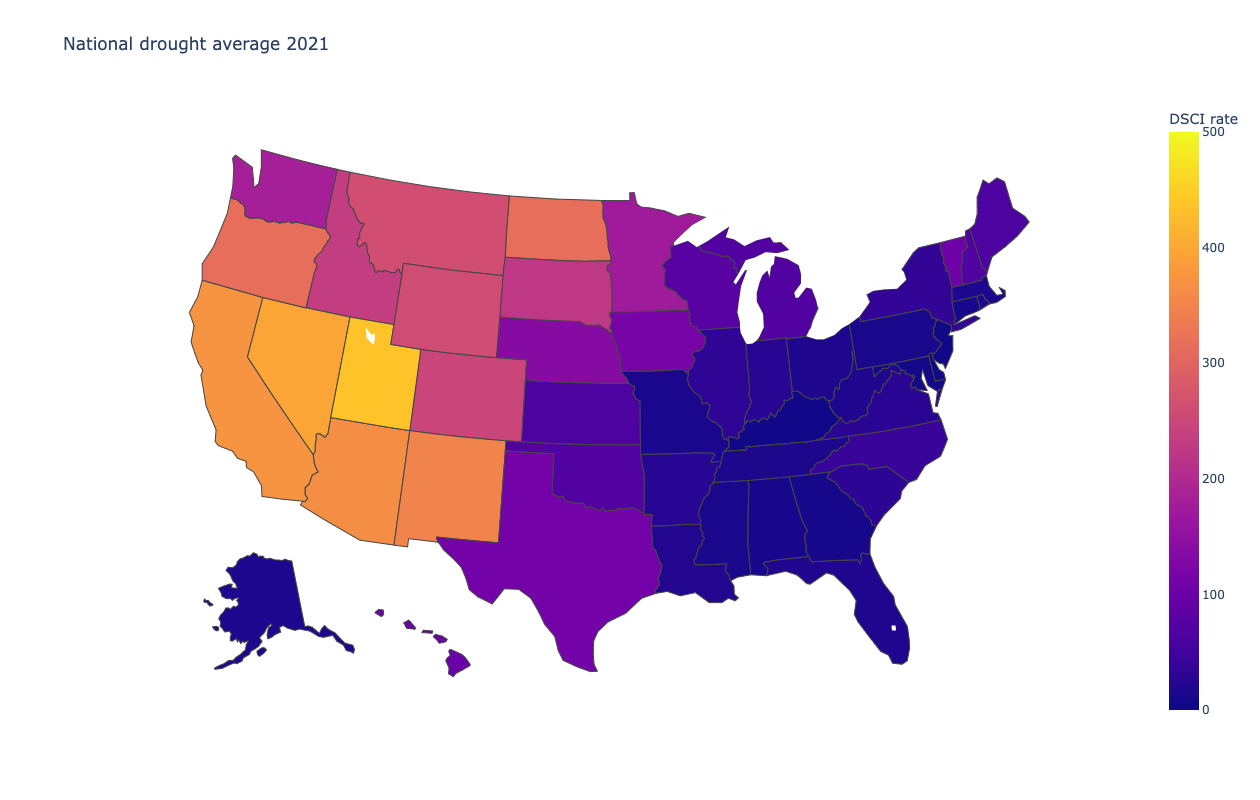

In [24]:
graph_years(mean_year,2021)

In [25]:
utah_2020=utah.loc['2021-12-07':'2020-12-31']
cali_2020=cali.loc['2021-12-07':'2020-12-31']
nevada_2020=nevada.loc['2021-12-07':'2020-12-31']
arizona_2020=arizona.loc['2021-12-07':'2020-12-31']

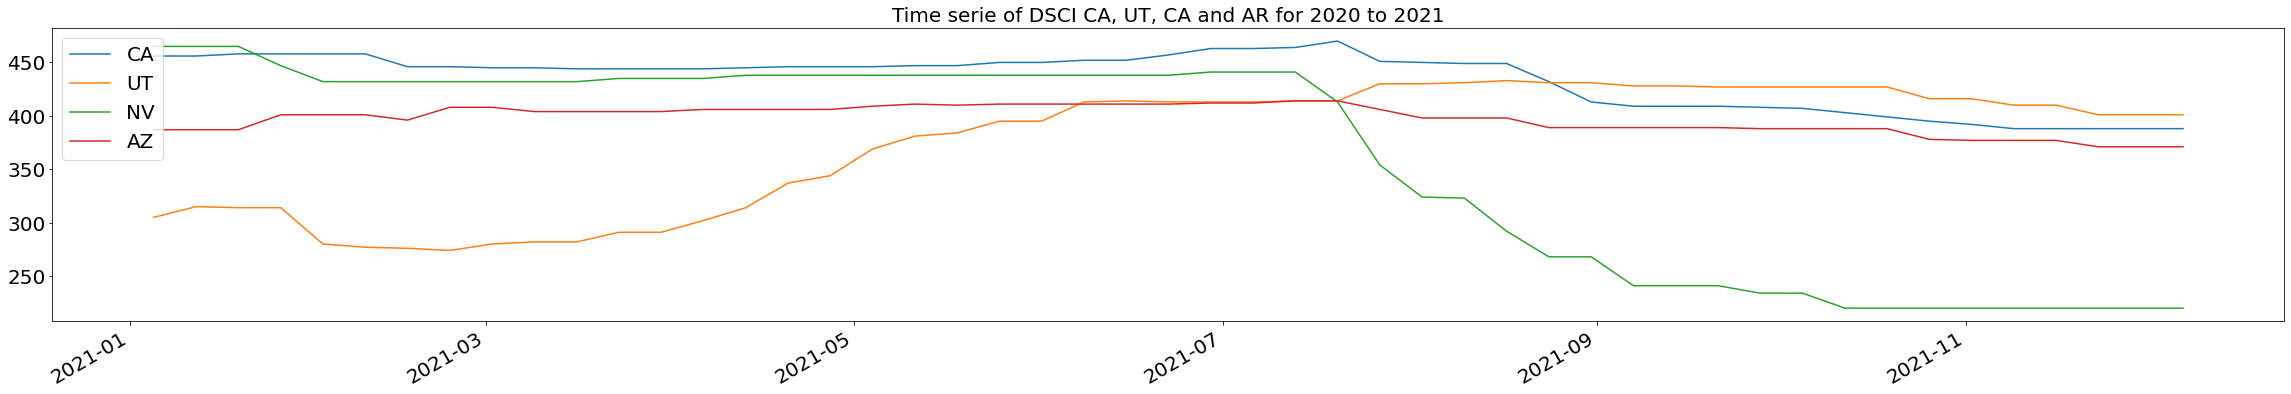

In [41]:
fig, ax = plt.subplots(figsize=(40, 6))

ax.plot(utah_2020['DSCI'])
ax.plot(cali_2020['DSCI'])
ax.plot(arizona_2020['DSCI'])
ax.plot(nevada_2020['DSCI'])

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.title('Time serie of DSCI CA, UT, CA and AR for 2020 to 2021',fontdict={'fontsize':20});
plt.legend(['CA','UT','NV','AZ'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images/2021.png')

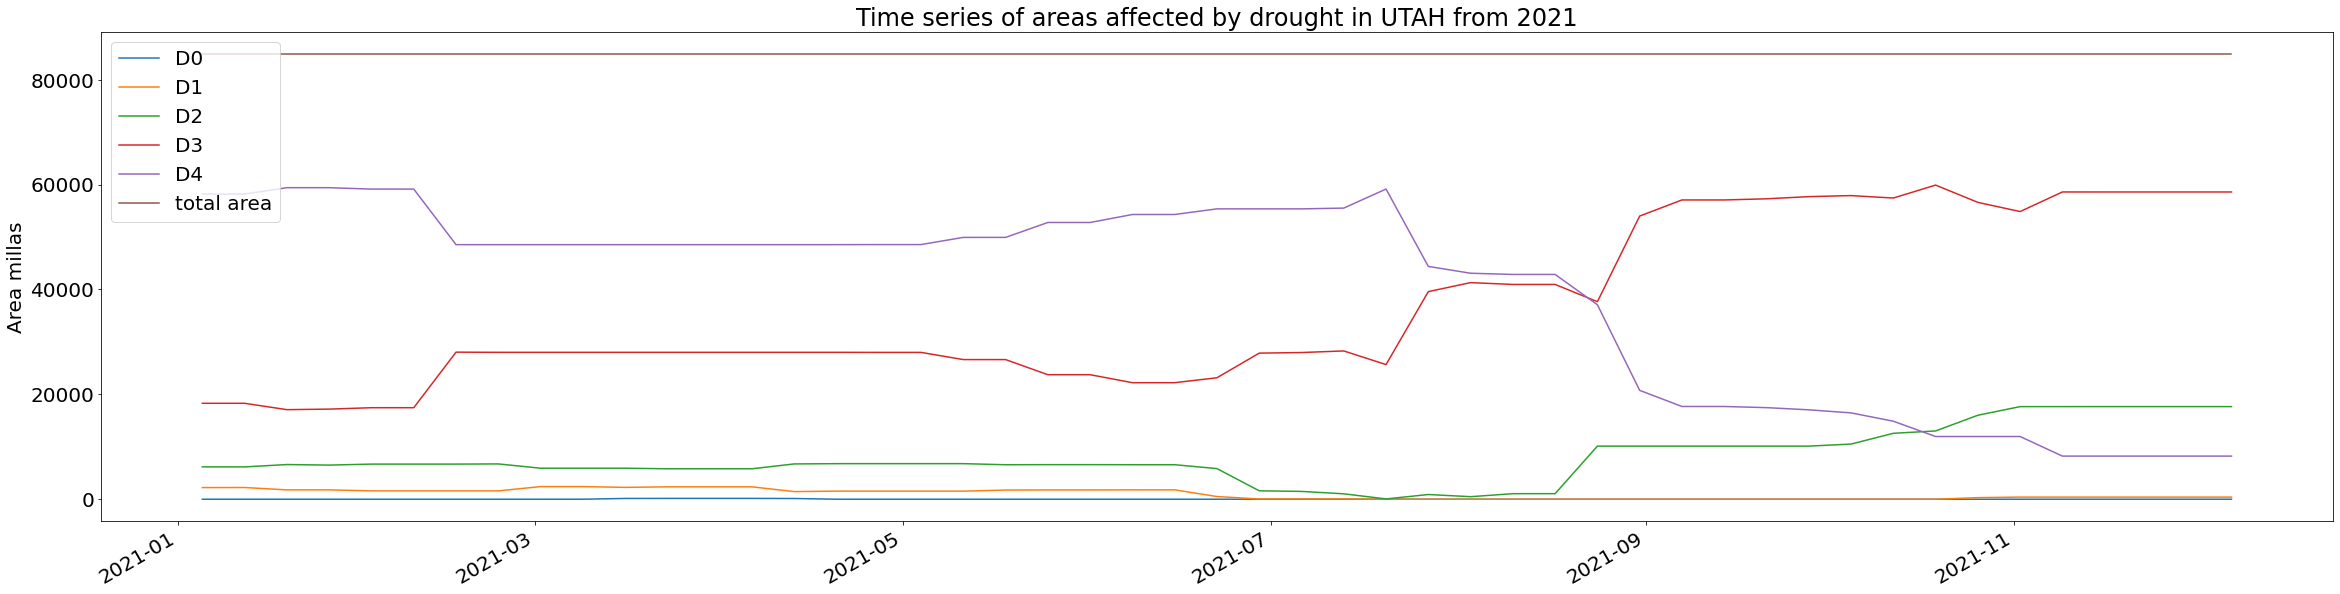

In [42]:
fig, ax = plt.subplots(figsize=(40, 10))

ax.plot(utah_2020[['area_d0','area_d1','area_d2','area_d3','area_d4','total_area']])

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.ylabel('Area millas',fontdict={'fontsize':20})
plt.title('Time series of areas affected by drought in UTAH from 2021',fontdict={'fontsize':24});
plt.legend(['D0','D1','D2','D3','D4','total area'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images/2021_area.png')

In [31]:
utah.head()

,Name,state,ValidEnd,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_area,total_population
ValidStart,,,,,,,,,,,,,,,,,,
2021-12-07,Utah,UT,2021-12-13,0.0,0.0,405.12,17661.71,58590.39,8220.84,0.0,0.0,1760.43,240947.54,2412967.19,108209.79,388,84878.06,2763884.95
2021-11-30,Utah,UT,2021-12-06,0.0,0.0,405.12,17661.71,58590.39,8220.84,0.0,0.0,1760.43,240947.54,2412967.19,108209.79,388,84878.06,2763884.95
2021-11-23,Utah,UT,2021-11-29,0.0,0.0,405.12,17661.71,58590.39,8220.84,0.0,0.0,1760.43,240947.54,2412967.19,108209.79,388,84878.06,2763884.95
2021-11-16,Utah,UT,2021-11-22,0.0,0.0,405.12,17661.71,58590.39,8220.84,0.0,0.0,1760.43,240947.54,2412967.19,108209.79,388,84878.06,2763884.95
2021-11-09,Utah,UT,2021-11-15,0.0,0.0,405.12,17659.10,58593.00,8220.84,0.0,0.0,1760.43,240943.76,2412970.98,108209.79,388,84878.06,2763884.96


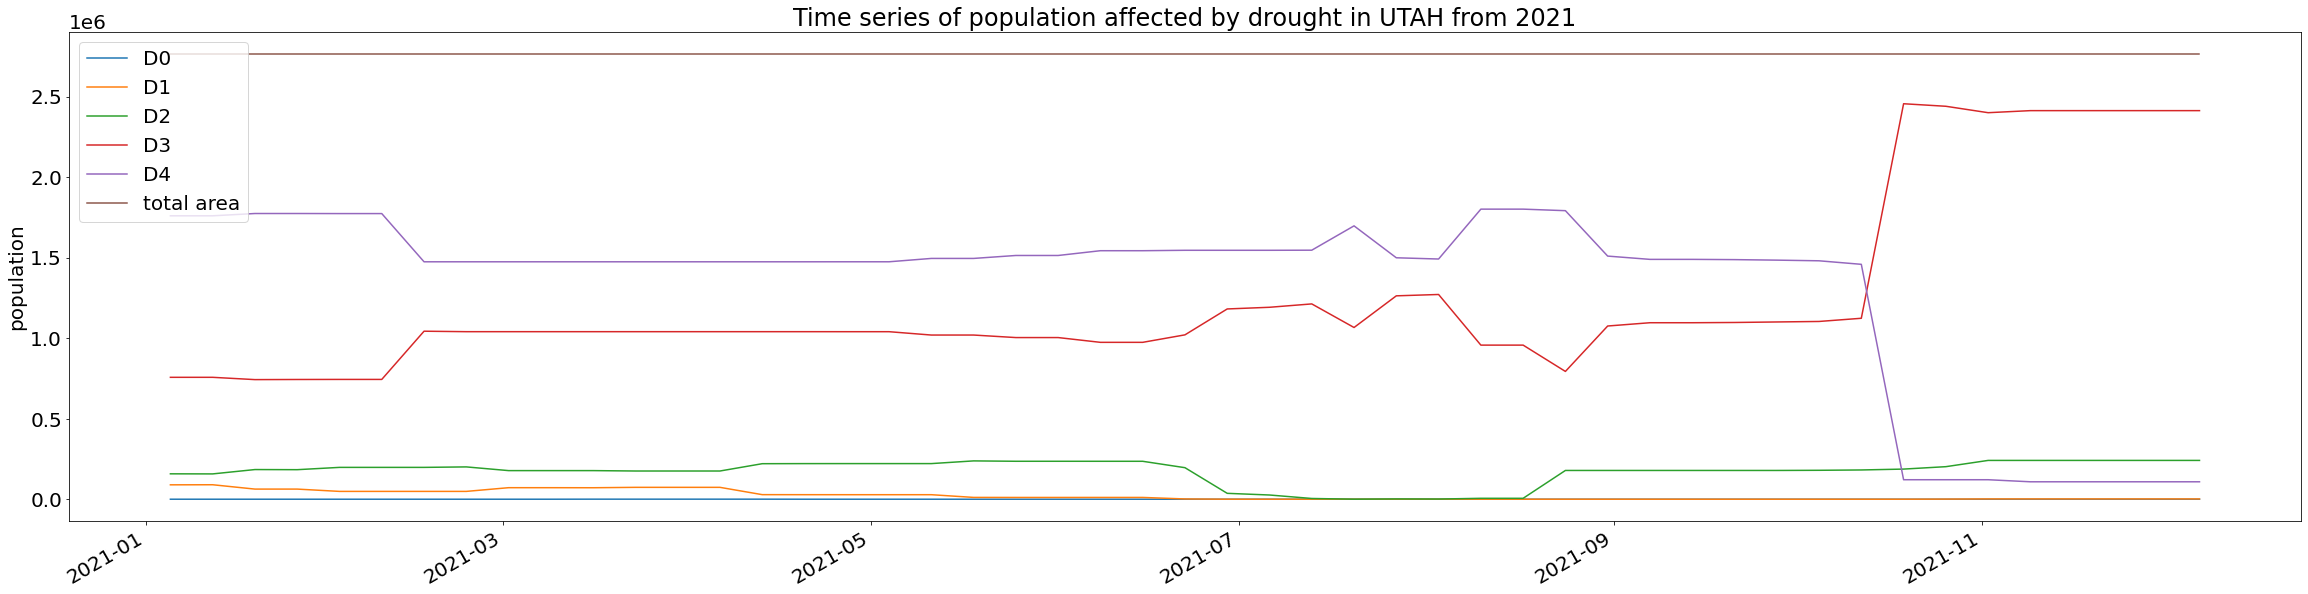

In [43]:
fig, ax = plt.subplots(figsize=(40, 10))

ax.plot(utah_2020[['population_d0','population_d1','population_d2','population_d3','population_d4','total_population']])

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.ylabel('population',fontdict={'fontsize':20})
plt.title('Time series of population affected by drought in UTAH from 2021',fontdict={'fontsize':24});
plt.legend(['D0','D1','D2','D3','D4','total area'],loc='upper left',fontsize=20);
fig.autofmt_xdate()
plt.savefig('./images/2021_population.png')